In [112]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft
import warnings
warnings.filterwarnings('ignore')

In [113]:
ticker = 'AAPL'
num_months = 72
end_date = datetime.now()
start_date = end_date - relativedelta(months=num_months)

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.323349,132742000
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.330456,85992800
2017-12-28,42.750000,42.962502,42.619999,42.770000,40.443924,65920800
2017-12-29,42.630001,42.647499,42.305000,42.307499,40.006573,103999600
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722874,102223600
...,...,...,...,...,...,...
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800


In [114]:
data_FT = df.reset_index()[['Date', 'Close']]
data_FT

,Date,Close
0,2017-12-26,42.642502
1,2017-12-27,42.650002
2,2017-12-28,42.770000
3,2017-12-29,42.307499
4,2018-01-02,43.064999
...,...,...
1504,2023-12-18,195.889999
1505,2023-12-19,196.940002
1506,2023-12-20,194.830002
1507,2023-12-21,194.679993


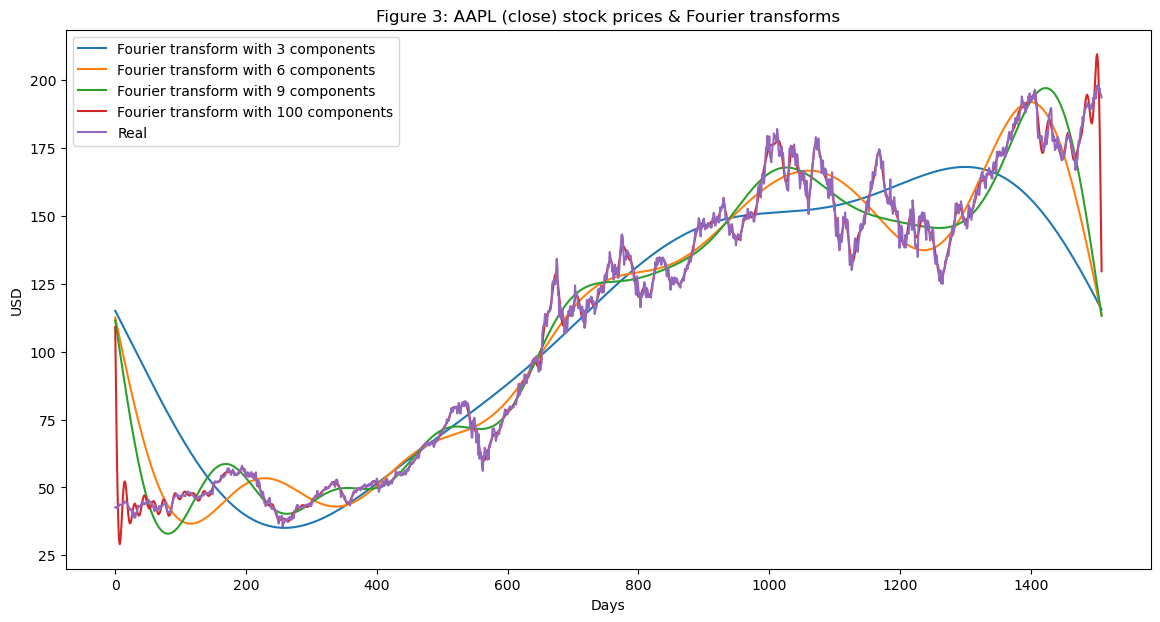

In [115]:
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7))
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10 = np.copy(fft_list) 
    fft_list_m10[num_:-num_] = 0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
    col_name = 'FT_{}'.format(num_)
    data_FT[col_name] = np.fft.ifft(fft_list_m10)
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: {} (close) stock prices & Fourier transforms'.format(ticker))
plt.legend()
plt.show()

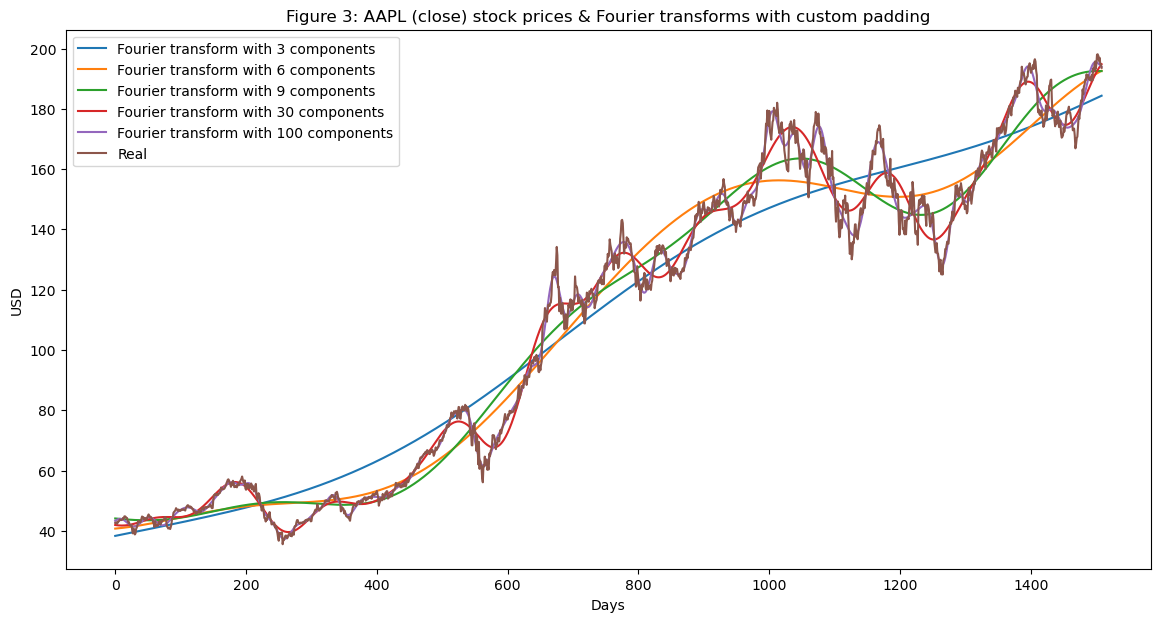

In [116]:
close_prices = data_FT['Close'].tolist()

# Decide on the number of points for padding
padding_points = len(close_prices)//2  # for example, you might want to adjust this number

# Create padding for the start and end
start_padding = [close_prices[0]] * padding_points
end_padding = [close_prices[-1]] * padding_points

# Pad the close_prices array
padded_close_prices = start_padding + close_prices + end_padding

# Perform the Fourier transform on the padded data
close_fft = np.fft.fft(padded_close_prices)

# Create a DataFrame to store the Fourier transform and its properties
fft_df = pd.DataFrame({'fft': close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7))
fft_list = np.asarray(fft_df['fft'].tolist())

# The new length after padding
new_length = len(fft_list)

for num_ in [3, 6, 9, 30, 100]:
    # Copy the original fft list
    fft_list_m10 = np.copy(fft_list)
    
    # Apply the filter to keep the first num_ components and the last num_ components
    fft_list_m10[num_:-num_] = 0
    
    # Inverse FFT on the padded data
    ifft_with_padding = np.fft.ifft(fft_list_m10)
    
    # Remove the padding by taking the middle part of the array
    ifft_no_padding = ifft_with_padding[padding_points:-padding_points]
    
    plt.plot(ifft_no_padding, label=f'Fourier transform with {num_} components')
    col_name = f'FT_{num_}'
    data_FT[col_name] = ifft_no_padding

plt.plot(close_prices, label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title(f'Figure 3: {ticker} (close) stock prices & Fourier transforms with custom padding')
plt.legend()
plt.show()


In [117]:
data_FT

,Date,Close,FT_3,FT_6,FT_9,FT_100,FT_30
0,2017-12-26,42.642502,38.311972-3.208349j,40.734566+4.421318j,44.091075+1.160324j,43.307002-0.183053j,41.925187+0.526964j
1,2017-12-27,42.650002,38.355343-3.268795j,40.753533+4.407312j,44.069778+1.201535j,43.455184-0.159359j,41.892132+0.503387j
2,2017-12-28,42.770000,38.398741-3.329113j,40.773047+4.392618j,44.048669+1.242324j,43.591300-0.128779j,41.862101+0.477845j
3,2017-12-29,42.307499,38.442167-3.389301j,40.793104+4.377238j,44.027759+1.282677j,43.711497-0.092633j,41.835209+0.450439j
4,2018-01-02,43.064999,38.485619-3.449357j,40.813699+4.361175j,44.007064+1.322579j,43.812334-0.052485j,41.811558+0.421274j
...,...,...,...,...,...,...,...
1504,2023-12-18,195.889999,183.935543+2.934828j,192.138054+4.475774j,192.539171-0.970041j,194.850674-0.185315j,193.584306+0.606480j
1505,2023-12-19,196.940002,184.036907+2.995818j,192.259298+4.464890j,192.535424-1.012971j,194.615148-0.200125j,193.915387+0.592761j
1506,2023-12-20,194.830002,184.138345+3.056692j,192.379179+4.453309j,192.529925-1.055545j,194.374548-0.206287j,194.229636+0.576730j
1507,2023-12-21,194.679993,184.239854+3.117446j,192.497689+4.441032j,192.522709-1.097747j,194.139420-0.203533j,194.526625+0.558448j
